In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [234]:
bc_data = load_breast_cancer()
X = bc_data["data"]
y = bc_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [235]:
bc_dframe = pd.DataFrame(data=X, columns=bc_data["feature_names"])
bc_dframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [236]:
bc_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## PCA
Principal component analysis (PCA) identifies a hyperplane that lies closest to the data set, then projects data onto that hyperplane. This projection seeks to minimize the information loss.

A *principal component* is a unit vector that minimizes mean-squared distance between data and their projection.

PCA uses singular value decomposition to compute these components:$X = U\cdot \Sigma \cdot V^T$, where $V$ is the principal component matrix.

In [237]:
# Center the data
X_c = X_train - X_train.mean(axis=0)
# Decompose. Vt is the component matrix.
U, s, Vt = np.linalg.svd(X_c)
V = Vt.T
v0 = V[:,0]
v1 = V[:,1]

We project onto a d-dimensional hyperplane by passing the centered training data through: $X' = X\cdot W_d$, where $W_d=[v_0 \ v_1 \ \cdots \ v_d]$

In [238]:
# Project into 2 dimensions for a scatterp plot
Wd = np.array([v0,v1]).T
X_prime = X_c.dot(Wd)
X_prime[0]
# Note: using linear algebra operations is flipping the sign of v0! Need to investigate.

array([-175.05690309,   -9.86920905])

The sklearn library does this operation within the decomposition package. It also provides other attributes, such as the variance ratios.

In [239]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X_train)

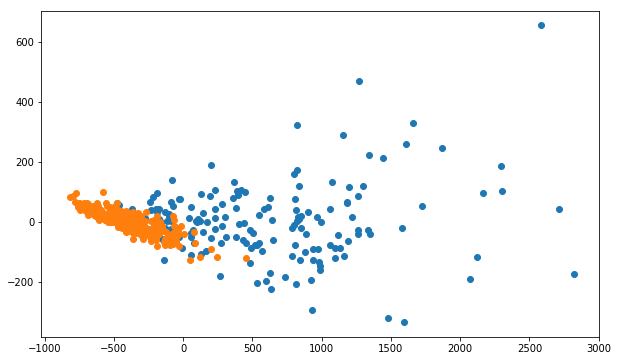

In [240]:
X2_targ0 = X_2[y_train==0]
X2_targ1 = X_2[y_train==1]
plt.figure(figsize=(10,6))
plt.scatter(X2_targ0[:,0], X2_targ0[:,1])
plt.scatter(X2_targ1[:,0], X2_targ1[:,1])
plt.show()

The projection of the data looks pretty good, but it may be too compressed. Let's look at a 3d mapping.

In [241]:
pca = PCA(n_components=3)
X_3 = pca.fit_transform(X_train)

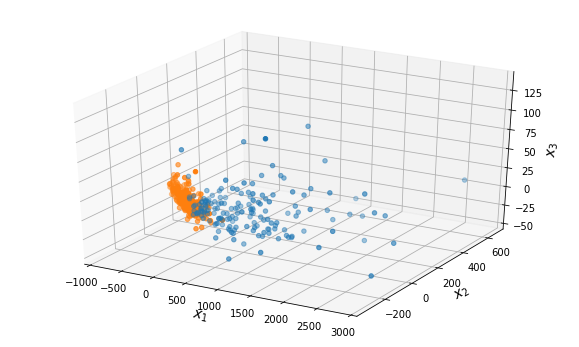

In [242]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

X3_targ0 = X_3[y_train==0]
X3_targ1 = X_3[y_train==1]
ax.scatter(X3_targ0[:,0],X3_targ0[:,1],X3_targ0[:,2])
ax.scatter(X3_targ1[:,0],X3_targ1[:,1],X3_targ1[:,2])
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_zlabel("$x_3$", fontsize=14)
plt.show()

The data was compressed to 2 and 3 dimensions and there appears to be clusters forming based on the label. Let's examine some of the PCA attributes for error, variance, etc.

In [243]:
pca.explained_variance_ratio_

array([9.82704336e-01, 1.63930415e-02, 6.73625723e-04])

These values compute how much of the data lies along a particular principal component. With this data set, the first component has 98$\%$ of the data's variance! The third component has negligible data variance, thus it does not carry a lot of information! Moving forward, you would apply PCA using 2 principal components and push through a chosen classification algorithm. 

PCA *compressed* the data set from 30 to only 2 dimensions. If necessary, we can compute the inverse (decompress) the information back to its original form.

In [244]:
X_recovered = pca.inverse_transform(X_3)
X_recovered.shape

(426, 30)

## Kernel PCA
Much like SVM, we can develop basis functions that split up high dimensional feature space linearly, e.g. radial basis functions. Using these tools requires hyperparameter tuning.

In [245]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=5e-5)
X_reduced = rbf_pca.fit_transform(X_train)

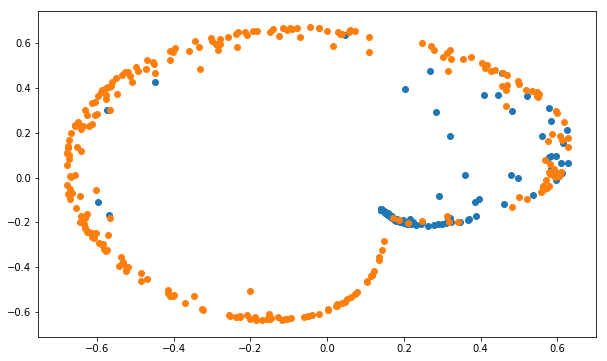

In [246]:
X2_targ0 = X_reduced[y_train==0]
X2_targ1 = X_reduced[y_train==1]
plt.figure(figsize=(10,6))
plt.scatter(X2_targ0[:,0], X2_targ0[:,1])
plt.scatter(X2_targ1[:,0], X2_targ1[:,1])
plt.show()

Hmm, not obvious if this is a good choice of hyperparameters. PCA is an *unsupervised learning* technique. Instead, build a pipeline to classify (or perform regression) and evaluate the results.

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

kpca = KernelPCA(n_components=2)
X_reduced_kpca = kpca.fit_transform(X_train)

log_reg = LogisticRegression()
log_reg.fit(X_reduced_kpca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [248]:
from random import randint
rand_idx = randint(0, len(y_test))

X_test_reduced = kpca.transform(X_test)

X_chosen = X_test_reduced[rand_idx]
print("Chosen test index = " + str(rand_idx))

y_pred = log_reg.predict([X_chosen])

print("Predicted: " + str(y_pred))
print("Actual: " + str(y_test[rand_idx]))

Chosen test index = 140
Predicted: [0]
Actual: 0


In [249]:
# Build a pipeline using KPCA and LogisticRegression

clf_pipe = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_clf", LogisticRegression())
])

clf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_clf', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [250]:
y_pipe_pred = clf_pipe.named_steps["log_clf"].predict([X_chosen])
print("Predicted: " + str(y_pipe_pred))
print("Actual: " + str(y_test[rand_idx]))

Predicted: [1]
Actual: 0


In [251]:
# Building a pipeline is fine. Now try GridSearchCV, as suggested in the book.

params = [{
    "kpca__gamma":np.linspace(1e-5,10e-5,10),
    "kpca__kernel":["linear","rbf","sigmoid"]
}]

grid_search = GridSearchCV(clf_pipe, params, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_clf', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05,
       9.e-05, 1.e-04]), 'kpca__kernel': ['linear', 'rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [252]:
grid_search.best_params_

{'kpca__gamma': 1e-05, 'kpca__kernel': 'linear'}

For this data set, the rbf and sigmoid do not appear to work as well as linear. I am not too surprised as vanilla PCA worked very well on this data set.

## Local Linear Embedding
LLE is a *manifold learning* technique: it searches for a manifold that best fits a collection of the data.

In [253]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30)
X_lle_reduced = lle.fit_transform(X_train)

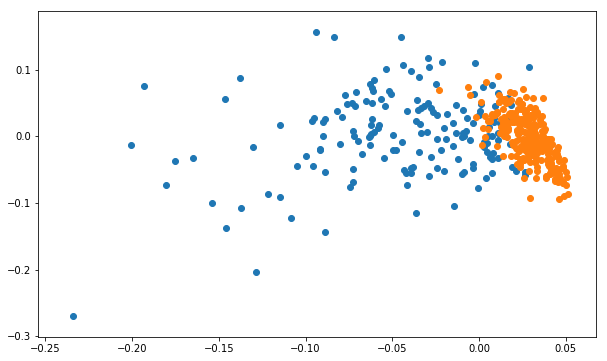

In [254]:
X_lle_reduced_targ0 = X_lle_reduced[y_train==0]
X_lle_reduced_targ1 = X_lle_reduced[y_train==1]
plt.figure(figsize=(10,6))
plt.scatter(X_lle_reduced_targ0[:,0], X_lle_reduced_targ0[:,1])
plt.scatter(X_lle_reduced_targ1[:,0], X_lle_reduced_targ1[:,1])
plt.show()

## Other Techniques
There are several other powerful dimensionality reduction techniques. Some well known ones are:
1. Multi-dimensional scaling (MDS)
2. t-Distributed Stochastic Neighbor Embedding (tSNE): Good for visualizing data in 2/3D
3. Linear Discriminant Analysis (LDA)

Let's play with t-SNE on this data set.

In [255]:
from sklearn.manifold import TSNE

X_tsne_reduced = TSNE(n_components=2,perplexity=30).fit_transform(X_train)

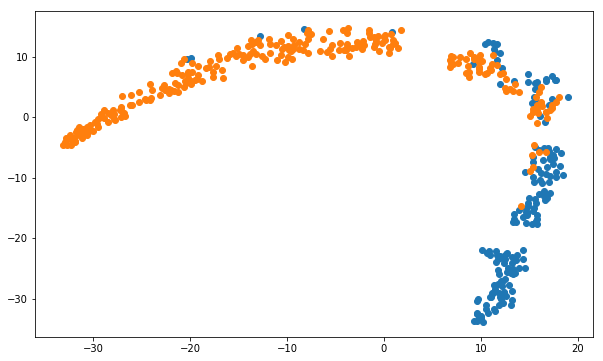

In [256]:
X_tsne_reduced_targ0 = X_tsne_reduced[y_train==0]
X_tsne_reduced_targ1 = X_tsne_reduced[y_train==1]
plt.figure(figsize=(10,6))
plt.scatter(X_tsne_reduced_targ0[:,0], X_tsne_reduced_targ0[:,1])
plt.scatter(X_tsne_reduced_targ1[:,0], X_tsne_reduced_targ1[:,1])
plt.show()